## Clustering

In [55]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# import clustering algs
from sklearn.cluster import KMeans, DBSCAN

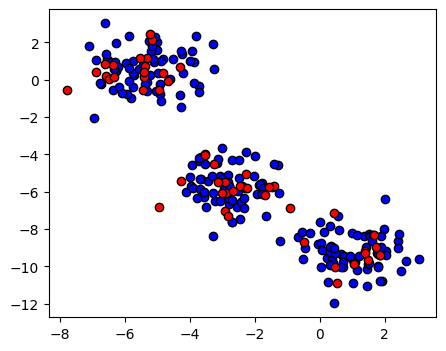

In [56]:
X , y = make_blobs(n_samples = 250, n_features = 2, random_state=16) #, centers = clusters

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

_, ax = plt.subplots(figsize = (5,4))
ax.scatter( X_train[:, 0], X_train[:, 1], edgecolors='k', c='b')
ax.scatter( X_test[:, 0], X_test[:, 1], edgecolors='k', c='r')
plt.show()

In [57]:
# import decision boundaries function
import sys
sys.path.append('/content/drive/MyDrive/machine_learning/Tools')
from utils import plot_decision_boundary

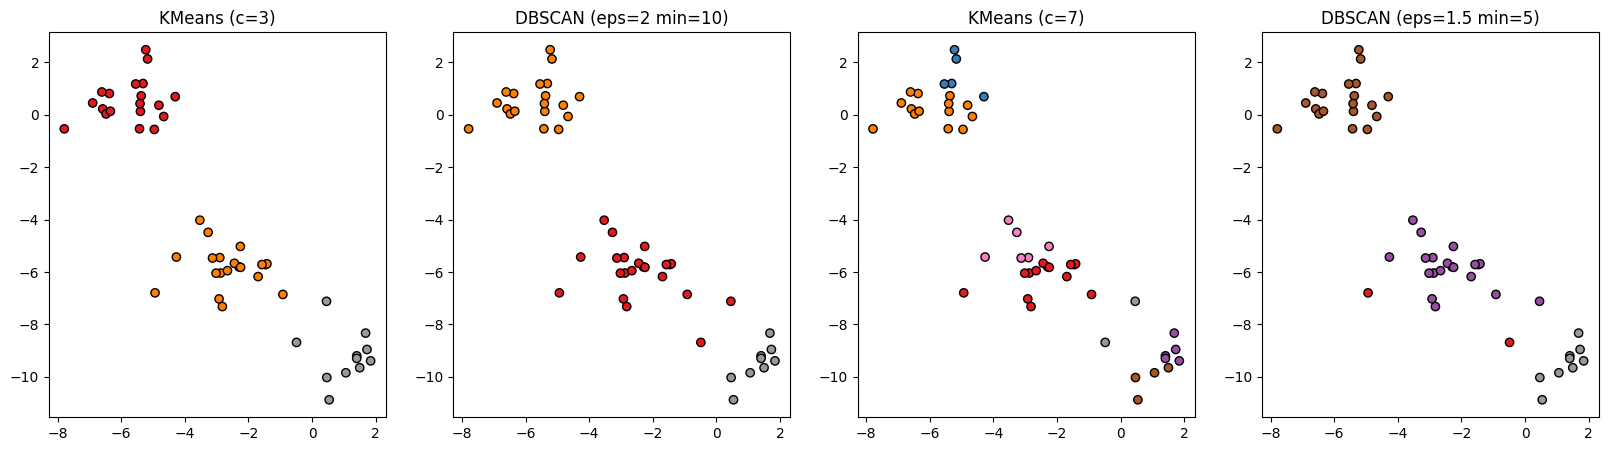

In [58]:
from re import A
models = [ KMeans(n_clusters=3) , DBSCAN(eps=2, min_samples=10),
          KMeans(n_clusters=7), DBSCAN(eps=1.5, min_samples=5) ]

names = ["KMeans (c=3)", "DBSCAN (eps=2 min=10)",
         "KMeans (c=7)", "DBSCAN (eps=1.5 min=5)"]

_, axes = plt.subplots(1, 4, figsize = (20,5))
preds = {};

# fit the model
for i, (model, name, ax) in enumerate(zip(models, names, axes)) :
    # Instance and train

    # Predictions on train and test sets
    if name.startswith('DBSCAN') :
      preds[name] = model.fit(X_test).labels_
    else :
      preds[name] = model.fit(X_train).predict(X_test)

    # Plot everything
    ax.scatter( X_test[:, 0], X_test[:, 1], edgecolors='k', c=preds[name], cmap='Set1'); ax.set_title(name)
plt.show()

## Metrics

The metrics module [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn

In [59]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

In [64]:
## Scores for training data

for name in names :
  print ("########----- Results for {0} -----########".format( name ))
  ari = adjusted_rand_score( y_test, preds[name]  )
  ami = adjusted_mutual_info_score( y_test, preds[name] )
  sil = silhouette_score( y_test.reshape(-1, 1) , preds[name] )
  ##--------------
  print("-- ARI --\t -- AMI --\t -- SIL --")
  print("  {0:.3f}  \t   {1:.3f}  \t   {2:.3f}  \t".format(ari, ami, sil))

########----- Results for KMeans (c=3) -----########
-- ARI --	 -- AMI --	 -- SIL --
  1.000  	   1.000  	   1.000  	
########----- Results for DBSCAN (eps=2 min=10) -----########
-- ARI --	 -- AMI --	 -- SIL --
  0.896  	   0.882  	   0.882  	
########----- Results for KMeans (c=7) -----########
-- ARI --	 -- AMI --	 -- SIL --
  0.606  	   0.727  	   0.000  	
########----- Results for DBSCAN (eps=1.5 min=5) -----########
-- ARI --	 -- AMI --	 -- SIL --
  0.893  	   0.848  	   0.841  	


In [67]:
## Scores for test data

for i, key in enumerate(preds.keys()):
  print ("########----- Results for {0} -----########".format( key ))
  ari = adjusted_rand_score( y_test, preds[name]  )
  ami = adjusted_mutual_info_score( y_test, preds[name] )
  sil = silhouette_score( y_test.reshape(-1, 1) , preds[name] )
  ##--------------
  print("-- ARI --\t -- AMI --\t -- SIL --")
  print("  {0:.3f}  \t   {1:.3f}  \t   {2:.3f}  \t".format(ari, ami, sil))

########----- Results for KMeans (c=3) -----########
-- ARI --	 -- AMI --	 -- SIL --
  0.893  	   0.848  	   0.841  	
########----- Results for DBSCAN (eps=2 min=10) -----########
-- ARI --	 -- AMI --	 -- SIL --
  0.893  	   0.848  	   0.841  	
########----- Results for KMeans (c=7) -----########
-- ARI --	 -- AMI --	 -- SIL --
  0.893  	   0.848  	   0.841  	
########----- Results for DBSCAN (eps=1.5 min=5) -----########
-- ARI --	 -- AMI --	 -- SIL --
  0.893  	   0.848  	   0.841  	


## In real data

In [ ]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()
images = (digits.images > 6) * 1.0

_, axes = plt.subplots(1,10, figsize=(20,4))
for i, ax in enumerate(axes):
  ax.imshow(images[i].reshape(8,8), cmap="gray")

plt.show()